In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/jibrilnikki/Documents/Code/Sentimen Pemilu/dicoding/Assignment-1_Data.csv', sep=';',parse_dates=['Date'])
df.head()

/var/folders/87/7c4rkvps35s3h1x7w31r80s40000gn/T/ipykernel_4818/592146393.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/jibrilnikki/Documents/Code/Sentimen Pemilu/dicoding/Assignment-1_Data.csv', sep=';',parse_dates=['Date'])


BillNo                             Itemname  Quantity              Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  01.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  01.12.2010 08:26   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01.12.2010 08:26   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6  01.12.2010 08:26   

  Price  CustomerID         Country  
0  2,55     17850.0  United Kingdom  
1  3,39     17850.0  United Kingdom  
2  2,75     17850.0  United Kingdom  
3  3,39     17850.0  United Kingdom  
4  3,39     17850.0  United Kingdom

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359663 entries, 0 to 359662
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      359663 non-null  object 
 1   Itemname    358402 non-null  object 
 2   Quantity    359663 non-null  int64  
 3   Date        359662 non-null  object 
 4   Price       359662 non-null  object 
 5   CustomerID  262461 non-null  float64
 6   Country     359662 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 19.2+ MB


In [14]:
df.describe()

Quantity     CustomerID
count  359663.000000  262461.000000
mean       10.244888   15308.833301
std       135.043051    1726.108760
min     -9600.000000   12346.000000
25%         1.000000   13871.000000
50%         3.000000   15249.000000
75%        10.000000   16820.000000
max     74215.000000   18287.000000

In [15]:
df.isna().sum()

BillNo            0
Itemname       1261
Quantity          0
Date              1
Price             1
CustomerID    97202
Country           1
dtype: int64

In [3]:
#Membuat variabel baru bernaam 'Total_Harga'
df['Price'] = df['Price'].str.replace(',', '.').astype('float64')
df['Total_Harga'] = df.Quantity * df.Price

In [4]:
# Menampilkan negara yang terdapat pada kolom Country
print("Negara:", df['Country'].nunique())

# Mengkalkulasi seluruh total pesanan tiap negara yang ada
print(df['Country'].value_counts())

Negara: 30
Country
United Kingdom          487622
Germany                   9042
France                    8408
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Unspecified                446
Austria                    398
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     18
Saudi Arabia                 9
Name: count, dtype: int64


In [ ]:
# Menghilangkan kolom Country
df.drop('Country', axis=1, inplace=True)

In [6]:
df[df['BillNo'].str.isdigit() == False]

BillNo         Itemname  Quantity              Date     Price  \
288772  A563185  Adjust bad debt         1  12.08.2011 14:50  11062.06   
288773  A563186  Adjust bad debt         1  12.08.2011 14:51 -11062.06   
288774  A563187  Adjust bad debt         1  12.08.2011 14:52 -11062.06   

        CustomerID  Total_Harga  
288772         NaN     11062.06  
288773         NaN    -11062.06  
288774         NaN    -11062.06

In [7]:
#Menampilkan kolom yang terdapat value non-digit
df[df['BillNo'].str.isdigit() == False]

BillNo         Itemname  Quantity              Date     Price  \
288772  A563185  Adjust bad debt         1  12.08.2011 14:50  11062.06   
288773  A563186  Adjust bad debt         1  12.08.2011 14:51 -11062.06   
288774  A563187  Adjust bad debt         1  12.08.2011 14:52 -11062.06   

        CustomerID  Total_Harga  
288772         NaN     11062.06  
288773         NaN    -11062.06  
288774         NaN    -11062.06

In [ ]:
# Menghapus tipe 'Adjust bad debt' pada kolom Itemname
df = df[df['Itemname'] != "Adjust bad debt"]

In [9]:
# Filter dataset untuk kolom Itemname agar tidak null
df = df[df['Itemname'].notna()]

# Jumlah barang yang unique
print("Jumlah barang unique:", df['Itemname'].nunique())

# Kalkulasi top 5 barang paling banyak
print(df['Itemname'].value_counts()[:5])

Jumlah barang unique: 4184
Itemname
WHITE HANGING HEART T-LIGHT HOLDER    2269
JUMBO BAG RED RETROSPOT               2087
REGENCY CAKESTAND 3 TIER              1930
PARTY BUNTING                         1677
LUNCH BAG RED RETROSPOT               1570
Name: count, dtype: int64


In [10]:
# Filter data barang yang memiliki kuantitas tidak valid (kurang dari 1)
df[df['Quantity'] < 1]

BillNo Itemname  Quantity              Date  Price  CustomerID  \
7122    537032        ?       -30  03.12.2010 16:50    0.0         NaN   
12926   537425    check       -20  06.12.2010 15:35    0.0         NaN   
12927   537426    check       -35  06.12.2010 15:36    0.0         NaN   
12973   537432  damages       -43  06.12.2010 16:10    0.0         NaN   
20844   538072   faulty       -13  09.12.2010 14:10    0.0         NaN   
...        ...      ...       ...               ...    ...         ...   
515634  581210    check       -26  07.12.2011 18:36    0.0         NaN   
515636  581212     lost     -1050  07.12.2011 18:38    0.0         NaN   
515637  581213    check       -30  07.12.2011 18:38    0.0         NaN   
517209  581226  missing      -338  08.12.2011 09:56    0.0         NaN   
519172  581422  smashed      -235  08.12.2011 15:24    0.0         NaN   

        Total_Harga  
7122           -0.0  
12926          -0.0  
12927          -0.0  
12973          -0.0  
20844          -0.0  
...             ...  
515634         -0.0  
515636         -0.0  
515637         -0.0  
517209         -0.0  
519172         -0.0  

[473 rows x 7 columns]

In [11]:
# Hapus data kuantitas barang yang tidak valid
df = df[df['Quantity'] >= 1]
df

BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365                  WHITE METAL LANTERN         6   
2       536365       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...                                  ...       ...   
522059  581587          PACK OF 20 SPACEBOY NAPKINS        12   
522060  581587          CHILDREN'S APRON DOLLY GIRL         6   
522061  581587         CHILDRENS CUTLERY DOLLY GIRL         4   
522062  581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
522063  581587         BAKING SET 9 PIECE RETROSPOT         3   

                    Date  Price  CustomerID  Total_Harga  
0       01.12.2010 08:26   2.55     17850.0        15.30  
1       01.12.2010 08:26   3.39     17850.0        20.34  
2       01.12.2010 08:26   2.75     17850.0        22.00  
3       01.12.2010 08:26   3.39     17850.0        20.34  
4       01.12.2010 08:26   3.39     17850.0        20.34  
...                  ...    ...         ...          ...  
522059  09.12.2011 12:50   0.85     12680.0        10.20  
522060  09.12.2011 12:50   2.10     12680.0        12.60  
522061  09.12.2011 12:50   4.15     12680.0        16.60  
522062  09.12.2011 12:50   4.15     12680.0        16.60  
522063  09.12.2011 12:50   4.95     12680.0        14.85  

[520133 rows x 7 columns]

In [12]:
# Cek apakah terdapat data harga nol
harga_nol = len(df[df['Price'] == 0])
print("Banyak harga nol:", harga_nol)

# Cek apakah terdapat data harga negatif
harga_negatif = len(df[df['Price'] < 0])
print("Banyak harga negatif:", harga_negatif)

Banyak harga nol: 583
Banyak harga negatif: 0


In [13]:
# Hapus harga yang dianggap 0
df = df[df['Price'] != 0]

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Copy original DataFrame
df2 = df.copy()

# Filter items yang muncul lebih dari 1 kali
item_counts = df2['Itemname'].value_counts()
filtered_items = item_counts[item_counts > 1].index
df2 = df2[df2['Itemname'].isin(filtered_items)]

# Buat pivot table
pivot_table = pd.crosstab(df2['BillNo'], df2['Itemname'])
pivot_table = (pivot_table > 0).astype(int) 

frequent_itemsets = apriori(pivot_table, min_support=0.015, use_colnames=True)

print("itemset yang sering muncul:")
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print("\nAssociation Rules:")
print(rules)


/Users/jibrilnikki/Documents/Code/Sentimen Pemilu/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
      support                                           itemsets
0    0.015956                           (10 COLOUR SPACEBOY PEN)
1    0.018053                    (12 PENCIL SMALL TUBE WOODLAND)
2    0.018411              (12 PENCILS SMALL TUBE RED RETROSPOT)
3    0.018053                      (12 PENCILS SMALL TUBE SKULL)
4    0.015393               (3 HEARTS HANGING DECORATION RUSTIC)
..        ...                                                ...
711  0.016160  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...
712  0.015035  (LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,...
713  0.015444  (LUNCH BAG SPACEBOY DESIGN, LUNCH BAG WOODLAND...
714  0.015802  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...
715  0.016621  (STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...

[716 rows x 2 columns]

Association Rules:
                                           antecedents  \
0                 (PACK OF 60 PINK PAISLEY CAKE CASES)   
1                        (60 TEATIME FAIR

In [ ]:
# Statistik deskriptif untuk semua metrik penting
print(rules[['support', 'confidence', 'lift']].describe())

          support  confidence        lift
count  559.000000  559.000000  559.000000
mean     0.019322    0.443514    9.670199
std      0.004564    0.155536    5.149610
min      0.015035    0.200388    1.882014
25%      0.016058    0.319688    6.453544
50%      0.017337    0.420391    8.350330
75%      0.021121    0.545612   12.218748
max      0.041884    0.903339   39.192741


In [25]:
frequent_itemsets

support                                           itemsets
0    0.015956                           (10 COLOUR SPACEBOY PEN)
1    0.018053                    (12 PENCIL SMALL TUBE WOODLAND)
2    0.018411              (12 PENCILS SMALL TUBE RED RETROSPOT)
3    0.018053                      (12 PENCILS SMALL TUBE SKULL)
4    0.015393               (3 HEARTS HANGING DECORATION RUSTIC)
..        ...                                                ...
711  0.016160  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...
712  0.015035  (LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,...
713  0.015444  (LUNCH BAG SPACEBOY DESIGN, LUNCH BAG WOODLAND...
714  0.015802  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...
715  0.016621  (STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...

[716 rows x 2 columns]

In [15]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules

antecedents  \
441  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   
437  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...   
405  (CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...   
442  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   
550  (PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...   
..                                                 ...   
525                          (LUNCH BAG RED RETROSPOT)   
341                         (REGENCY CAKESTAND 3 TIER)   
314                          (LUNCH BAG RED RETROSPOT)   
203                          (JUMBO BAG RED RETROSPOT)   
190                          (JUMBO BAG RED RETROSPOT)   

                                           consequents  antecedent support  \
441                  (GREEN REGENCY TEACUP AND SAUCER)            0.029099   
437                  (GREEN REGENCY TEACUP AND SAUCER)            0.018922   
405                      (RED RETROSPOT CHARLOTTE BAG)            0.019280   
442                  (ROSES REGENCY TEACUP AND SAUCER)            0.030889   
550                  (ROSES REGENCY TEACUP AND SAUCER)            0.018922   
..                                                 ...                 ...   
525  (LUNCH BAG SPACEBOY DESIGN, LUNCH BAG  BLACK S...            0.078807   
341                                    (PARTY BUNTING)            0.097371   
314                                    (PARTY BUNTING)            0.078807   
203                          (RECYCLING BAG RETROSPOT)            0.105400   
190                         (JUMBO STORAGE BAG SKULLS)            0.105400   

     consequent support   support  confidence       lift  representativity  \
441            0.049760  0.026286    0.903339  18.154054               1.0   
437            0.049760  0.016467    0.870270  17.489481               1.0   
405            0.052470  0.016621    0.862069  16.429724               1.0   
442            0.051754  0.026286    0.850993  16.443008               1.0   
550            0.051754  0.015802    0.835135  16.136593               1.0   
..                  ...       ...         ...        ...               ...   
525            0.025928  0.016058    0.203764   7.858771               1.0   
341            0.084637  0.019740    0.202731   2.395289               1.0   
314            0.084637  0.015956    0.202466   2.392156               1.0   
203            0.037997  0.021172    0.200873   5.286511               1.0   
190            0.035952  0.021121    0.200388   5.573812               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
441  0.024838    9.830668       0.973236  0.500000   0.898278    0.715801  
437  0.015526    7.324769       0.961007  0.315377   0.863477    0.600603  
405  0.015609    6.869592       0.957597  0.301484   0.854431    0.589417  
442  0.024688    6.363783       0.969119  0.466425   0.842861    0.679449  
550  0.014823    5.751655       0.956121  0.287978   0.826137    0.570236  
..        ...         ...            ...       ...        ...         ...  
525  0.014015    1.223345       0.947417  0.181084   0.182569    0.411547  
341  0.011499    1.148123       0.645353  0.121651   0.129013    0.217982  
314  0.009286    1.147741       0.631754  0.108183   0.128723    0.195493  
203  0.017167    1.203818       0.906371  0.173222   0.169309    0.379037  
190  0.017332    1.205645       0.917270  0.175670   0.170569    0.393935  

[559 rows x 14 columns]

In [16]:
rules.sort_values(by='support', ascending=False)

antecedents  \
147                         (JUMBO BAG PINK POLKADOT)   
146                         (JUMBO BAG RED RETROSPOT)   
84                  (GREEN REGENCY TEACUP AND SAUCER)   
83                  (ROSES REGENCY TEACUP AND SAUCER)   
192                         (JUMBO BAG RED RETROSPOT)   
..                                                ...   
373                (SET OF 3 CAKE TINS PANTRY DESIGN)   
539  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIGN)   
207                   (RED TOADSTOOL LED NIGHT LIGHT)   
538    (LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT)   
54                        (COOK WITH WINE METAL SIGN)   

                           consequents  antecedent support  \
147          (JUMBO BAG RED RETROSPOT)            0.061931   
146          (JUMBO BAG PINK POLKADOT)            0.105400   
84   (ROSES REGENCY TEACUP AND SAUCER)            0.049760   
83   (GREEN REGENCY TEACUP AND SAUCER)            0.051754   
192           (JUMBO STORAGE BAG SUKI)            0.105400   
..                                 ...                 ...   
373     (SET OF 4 PANTRY JELLY MOULDS)            0.068835   
539              (LUNCH BAG CARS BLUE)            0.028332   
207          (JUMBO BAG RED RETROSPOT)            0.042907   
538            (LUNCH BAG SUKI DESIGN)            0.027872   
54    (HAND OVER THE CHOCOLATE   SIGN)            0.035798   

     consequent support   support  confidence       lift  representativity  \
147            0.105400  0.041884    0.676301   6.416488               1.0   
146            0.061931  0.041884    0.397380   6.416488               1.0   
84             0.051754  0.037333    0.750257  14.496565               1.0   
83             0.049760  0.037333    0.721344  14.496565               1.0   
192            0.060243  0.036872    0.349830   5.806943               1.0   
..                  ...       ...         ...        ...               ...   
373            0.053800  0.015035    0.218425   4.059964               1.0   
539            0.057891  0.015035    0.530686   9.166990               1.0   
207            0.105400  0.015035    0.350417   3.324627               1.0   
538            0.055078  0.015035    0.539450   9.794240               1.0   
54             0.034571  0.015035    0.420000  12.148935               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
147  0.035356    2.763674       0.899882  0.333877   0.638163    0.536840  
146  0.035356    1.556651       0.943608  0.333877   0.357595    0.536840  
84   0.034757    3.796886       0.979771  0.581673   0.736626    0.735800  
83   0.034757    3.410082       0.981832  0.581673   0.706752    0.735800  
192  0.030523    1.445402       0.925322  0.286338   0.308151    0.480942  
..        ...         ...            ...       ...        ...         ...  
373  0.011332    1.210633       0.809408  0.139734   0.173986    0.248946  
539  0.013395    2.007417       0.916890  0.211207   0.501847    0.395202  
207  0.010513    1.377191       0.730560  0.112817   0.273884    0.246533  
538  0.013500    2.051723       0.923643  0.221386   0.512605    0.406215  
54   0.013798    1.664533       0.951760  0.271719   0.399231    0.427456  

[559 rows x 14 columns]

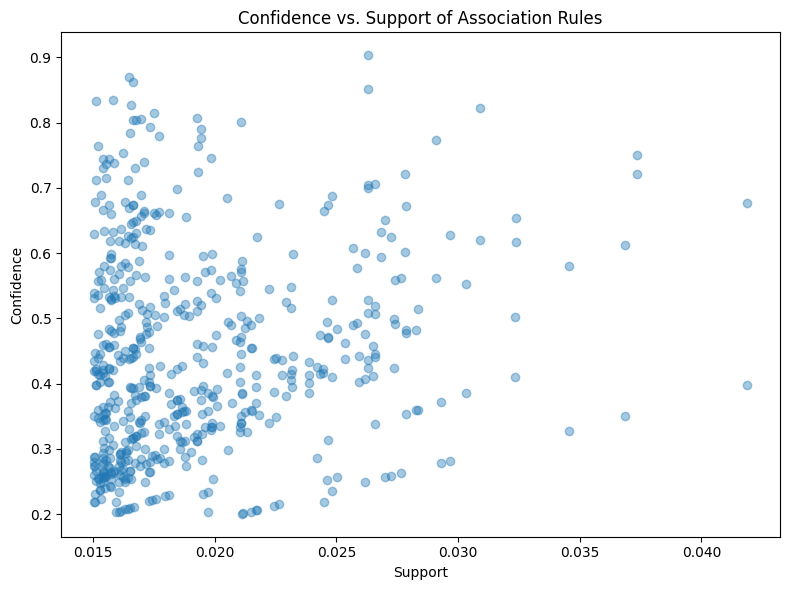

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

In [27]:
# Filter association rules untuk cross-selling
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules berdasarkan confidence dan support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Rekomendasi top selling produk
top_cross_selling = cross_selling_rules.head(5)

# Memfilter association rules untuk upselling 
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]

# Sort rules berdasarkan confidence dan support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

top_upselling = upselling_rules.head(5)


print("Rekomendasi Cross-Selling:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Pelanggan yang membeli '{antecedent}' juga membeli '{consequent}'.")

print("\n")

print("Rekomendasi Upselling:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"Pelanggan yang membeli '{antecedent}', direkomendasikan juga untuk membeli: {', '.join(consequents)}.")

Rekomendasi Cross-Selling:
Pelanggan yang membeli 'REGENCY TEA PLATE GREEN' juga membeli 'REGENCY TEA PLATE ROSES'.
Pelanggan yang membeli 'PINK REGENCY TEACUP AND SAUCER' juga membeli 'GREEN REGENCY TEACUP AND SAUCER'.
Pelanggan yang membeli 'SET/6 RED SPOTTY PAPER CUPS' juga membeli 'SET/6 RED SPOTTY PAPER PLATES'.
Pelanggan yang membeli 'SMALL MARSHMALLOWS PINK BOWL' juga membeli 'SMALL DOLLY MIX DESIGN ORANGE BOWL'.
Pelanggan yang membeli 'PINK REGENCY TEACUP AND SAUCER' juga membeli 'ROSES REGENCY TEACUP AND SAUCER'.


Rekomendasi Upselling:
Pelanggan yang membeli 'PINK REGENCY TEACUP AND SAUCER', direkomendasikan juga untuk membeli: ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER.
Pelanggan yang membeli 'GREEN REGENCY TEACUP AND SAUCER', direkomendasikan juga untuk membeli: ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER.
Pelanggan yang membeli 'ROSES REGENCY TEACUP AND SAUCER', direkomendasikan juga untuk membeli: GREEN REGENCY TEACUP AND SAUCER,

In [29]:
top_upselling = upselling_rules.sort_values(['confidence', 'support'], ascending=False).drop_duplicates('antecedents')[:5]
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"Pelanggan yang membeli '{antecedent}', direkomendasikan mencoba pembelian: {', '.join(consequents)}.")

Pelanggan yang membeli 'PINK REGENCY TEACUP AND SAUCER', direkomendasikan mencoba pembelian: ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER.
Pelanggan yang membeli 'GREEN REGENCY TEACUP AND SAUCER', direkomendasikan mencoba pembelian: ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER.
Pelanggan yang membeli 'ROSES REGENCY TEACUP AND SAUCER', direkomendasikan mencoba pembelian: GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER.
Pelanggan yang membeli 'STRAWBERRY CHARLOTTE BAG', direkomendasikan mencoba pembelian: CHARLOTTE BAG SUKI DESIGN, RED RETROSPOT CHARLOTTE BAG.
Pelanggan yang membeli 'CHARLOTTE BAG PINK POLKADOT', direkomendasikan mencoba pembelian: CHARLOTTE BAG SUKI DESIGN, RED RETROSPOT CHARLOTTE BAG.
